In [19]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

folder = os.path.join("/", "RanD", "CREMEv2_Result", "Reproducibility_Measurement", "Working", "V1")
del_cols_list = ["Label", ]

In [15]:
df1 = pd.read_csv(os.path.join(folder, "Original", "preprocess_label_traffic.csv"))
df2 = pd.read_csv(os.path.join(folder, "Test2022", "label_traffic.csv"))

df1 = df1.drop(columns=del_cols_list)
df2 = df2.drop(columns=del_cols_list)

max_cols = max(df1.shape[1], df2.shape[1])
print(max_cols)

51


In [16]:
df1 = df1.reindex(columns=[*df1.columns.tolist(), *[f"col_{i+1}" for i in range(max_cols - df1.shape[1])]])
df2 = df2.reindex(columns=[*df2.columns.tolist(), *[f"col_{i+1}" for i in range(max_cols - df2.shape[1])]])

In [18]:
np1 = df1.values
np2 = df2.values

mean1_val = np.nanmean(np1, axis=1)
mean2_val = np.nanmean(np2, axis=1)

In [24]:
np1_nonan = np.nan_to_num(np1, nan=0)
np2_nonan = np.nan_to_num(np2, nan=0)

In [32]:
df1_ = pd.DataFrame(np1_nonan)
df2_ = pd.DataFrame(np2_nonan)



In [25]:
scaler = StandardScaler()

pca = PCA(n_components=2)

ground_truth_scaled = scaler.fit_transform(np1_nonan)

sec_1_scaled = scaler.fit_transform(np2_nonan)

In [26]:
ground_truth_covarianceMatrix = np.cov(np.transpose(np.array(ground_truth_scaled)))

sec_1_covarianceMatrix = np.cov(np.transpose(np.array(sec_1_scaled)))

In [27]:
pca_ground_truth = pca.fit(ground_truth_covarianceMatrix).transform(ground_truth_covarianceMatrix)

pca_sec_1 = pca.fit(sec_1_covarianceMatrix).transform(sec_1_covarianceMatrix)

In [28]:
df_pca_ground_truth = pd.DataFrame(pca_ground_truth, columns =['comp1','comp2'])
df_pca_ground_truth_vertical = df_pca_ground_truth['comp1'].append(df_pca_ground_truth['comp2']).reset_index(drop=True)



df_pca_sec_1 = pd.DataFrame(pca_sec_1, columns =['comp1','comp2'])
df_pca_sec_1_vertical = df_pca_sec_1['comp1'].append(df_pca_sec_1['comp2']).reset_index(drop=True)

/tmp/ipykernel_3164363/23097337.py:2: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_pca_ground_truth_vertical = df_pca_ground_truth['comp1'].append(df_pca_ground_truth['comp2']).reset_index(drop=True)
/tmp/ipykernel_3164363/23097337.py:7: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_pca_sec_1_vertical = df_pca_sec_1['comp1'].append(df_pca_sec_1['comp2']).reset_index(drop=True)


In [29]:
corr_gt_1 = np.corrcoef(df_pca_ground_truth_vertical, df_pca_sec_1_vertical)[0,1]

print("correlation of the data is {}".format(corr_gt_1))

correlation of the data is -0.06386454623546978


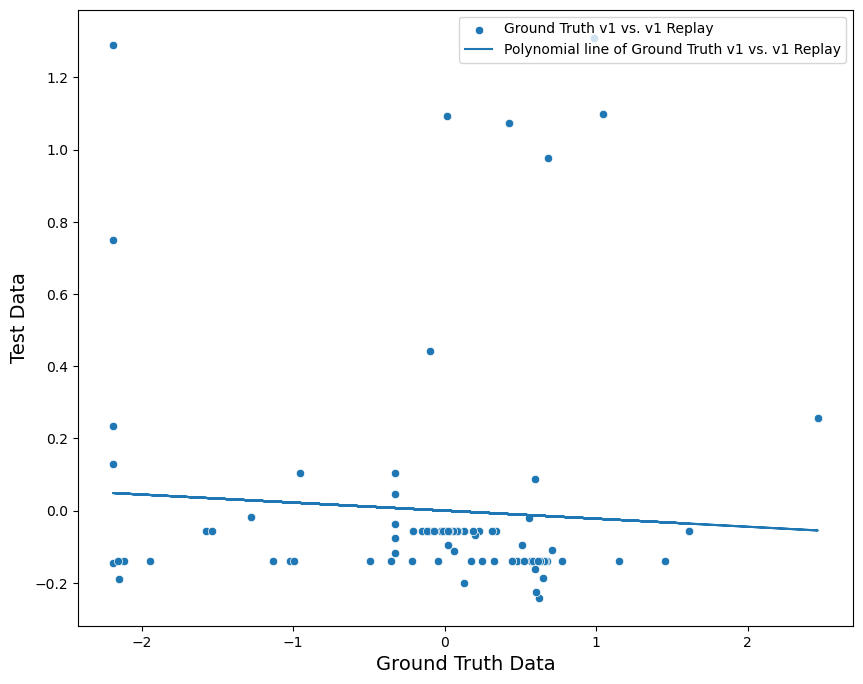

In [31]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns

#colors = sns.set_palette("tab10", n_colors=10)

fig, ax = plt.subplots(figsize=(10, 8))
sns.scatterplot(x=df_pca_ground_truth_vertical, y=df_pca_sec_1_vertical, label="Ground Truth v1 vs. v1 Replay")

# plt.title(f"Pearson Correlation Coefficient Plot", fontsize=14)

# polynomial plot
z_gt_1 = np.polyfit(df_pca_ground_truth_vertical, df_pca_sec_1_vertical, 1)
p_gt_1 = np.poly1d(z_gt_1)

plt.plot(df_pca_ground_truth_vertical, p_gt_1(df_pca_ground_truth_vertical), linestyle='solid', label='Polynomial line of Ground Truth v1 vs. v1 Replay')

handles, labels = plt.gca().get_legend_handles_labels()


ax.legend(handles=handles, loc='upper right')
plt.xlabel('Ground Truth Data', fontsize=14)
plt.ylabel('Test Data', fontsize=14)


plt.show()